In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
retail_df = pd.read_csv('../data/retail_data.csv')
minimums_df = pd.read_csv('../data/retail_0minimums.csv')
totals_df = pd.read_csv('../data/retail_totals.csv')
retail_df.head()

C:\Users\alecb\AppData\Local\Temp\ipykernel_52580\4283637056.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  minimums_df = pd.read_csv('../data/retail_0minimums.csv')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# standardizing features (quantity and unitprice)
# could try mixing in country as well
scaler = StandardScaler()
selected_features = retail_df[['CustomerID', 'Quantity', 'UnitPrice']]
scaled_features = scaler.fit_transform(selected_features.drop('CustomerID', axis=1))

C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\clust

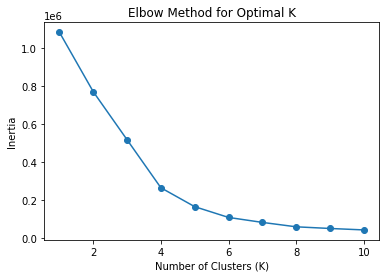

In [8]:
# finding number of clusters (k) using elbow method
# in this case, clusters are our different type of customers

# elbow method - visual method to determine optimal number of clusters
# the point where inertia stops dropping rapidly, or the line begins to kink
# creating an 'elbow'

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


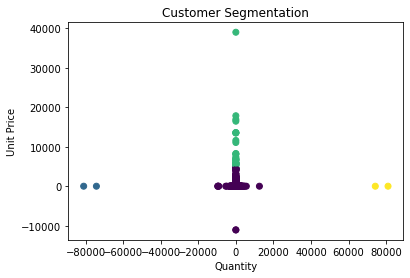

In [11]:
# k-means clustering
optimal_k = 4  # optimal k from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
retail_df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.scatter(retail_df['Quantity'], retail_df['UnitPrice'], c=retail_df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

In [ ]:
# looking at outliers
# should run clustering again without these outliers

In [16]:
retail_df[retail_df.UnitPrice == retail_df.UnitPrice.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.0,15098.0,United Kingdom,2


In [15]:
retail_df[retail_df.UnitPrice == retail_df.UnitPrice.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom,0
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom,0


In [17]:
retail_df[retail_df.Quantity == retail_df.Quantity.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,3


In [18]:
retail_df[retail_df.Quantity == retail_df.Quantity.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,1


### Segementation of customers Excluding returns
Returns being negative quantities and unitprices

C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\clust

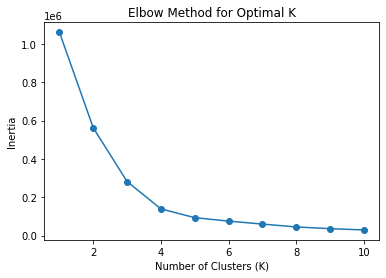

In [4]:
scaler = StandardScaler()
selected_features = minimums_df[['CustomerID', 'Quantity', 'UnitPrice']]
scaled_features = scaler.fit_transform(selected_features.drop('CustomerID', axis=1))

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


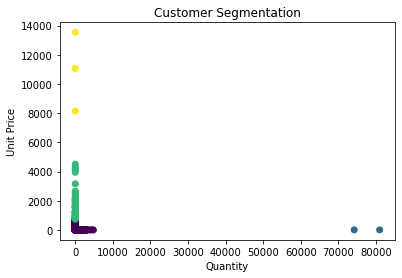

In [7]:
optimal_k = 4  # optimal k from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
minimums_df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.scatter(minimums_df['Quantity'], minimums_df['UnitPrice'], c=minimums_df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

### Segmentation of Customer Totals
TotalPrice and TotalQuantity

C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alecb\anaconda3\lib\site-packages\sklearn\clust

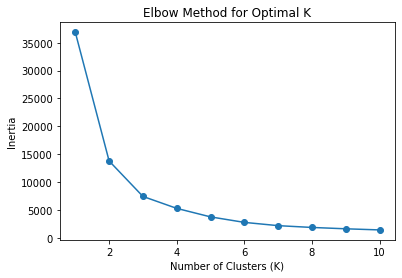

In [9]:
scaler = StandardScaler()
selected_features = totals_df[['CustomerID', 'TotalQuantity', 'TotalPrice']]
scaled_features = scaler.fit_transform(selected_features.drop('CustomerID', axis=1))

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

C:\Users\alecb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


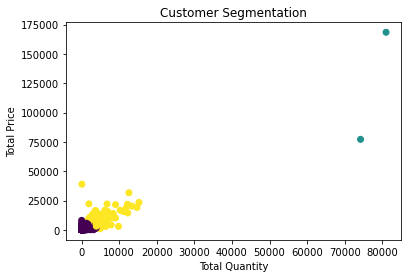

In [10]:
optimal_k = 3  # optimal k from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
totals_df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.scatter(totals_df['TotalQuantity'], totals_df['TotalPrice'], c=totals_df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Quantity')
plt.ylabel('Total Price')
plt.show()